<span style="font-size: 34px;">SHORTEST REMAINING TIME FIRST</span>

In [85]:
import matplotlib.pyplot as plt

In [86]:
processes = [
    {'process_id': 'A', 'arrival_time': 0, 'burst_time': 8, 'waiting_time': 0, 'turnaround_time': 8},
    {'process_id': 'B', 'arrival_time': 3, 'burst_time': 4, 'waiting_time': 1, 'turnaround_time': 5},
    {'process_id': 'C', 'arrival_time': 4, 'burst_time': 5, 'waiting_time': 0, 'turnaround_time': 5},
    {'process_id': 'D', 'arrival_time': 6, 'burst_time': 3, 'waiting_time': 2, 'turnaround_time': 5},
    {'process_id': 'E', 'arrival_time': 10, 'burst_time': 2, 'waiting_time': 0, 'turnaround_time': 2}
]

In [87]:
def srtf_scheduling(processes):
    processes.sort(key=lambda x: x['arrival_time'])  # Sort processes by arrival time

    ready_queue = []
    current_time = 0
    completed_processes = []
    remaining_processes = processes[:]  # Make a copy to avoid modifying the original list

    while remaining_processes or ready_queue:
        # Add processes to ready queue if they have arrived by the current time
        for process in remaining_processes[:]:
            if process['arrival_time'] <= current_time:
                ready_queue.append(process)
                remaining_processes.remove(process)

        if ready_queue:
            # Sort the ready queue based on the remaining burst time (SRTF)
            ready_queue.sort(key=lambda x: x['burst_time'])

            # Select the process with the shortest remaining time
            current_process = ready_queue.pop(0)

            # Update waiting time and turnaround time
            current_process['waiting_time'] = current_time - current_process['arrival_time']
            current_process['turnaround_time'] = current_process['waiting_time'] + current_process['burst_time']

            # Increment current time and decrease burst time
            current_time += 1
            current_process['burst_time'] -= 1

            # If the process is not finished, add it back to the ready queue
            if current_process['burst_time'] > 0:
                ready_queue.append(current_process)
            else:
                completed_processes.append(current_process)

        else:
            # If no process is in the ready queue, just increment the time
            current_time += 1

    # Calculate average waiting time and turnaround time
    waiting_time = sum(process['waiting_time'] for process in completed_processes)
    turnaround_time = sum(process['turnaround_time'] for process in completed_processes)
    avg_waiting_time = waiting_time / len(completed_processes)
    avg_turnaround_time = turnaround_time / len(completed_processes)

    return completed_processes, avg_waiting_time, avg_turnaround_time

<span style="font-size: 34px;">Gantt Chart Prettier</span>

In [88]:
def display_gantt_chart(processes):


    process_ids = [process['process_id'] for process in processes]
    start_times = [process['arrival_time'] for process in processes]
    end_times = [process['arrival_time'] + process['burst_time'] for process in processes]
    
    # Normalize completion times to [0, 1] for colormap
    burst_times = [process['burst_time'] for process in processes]
    norm = plt.Normalize(min(burst_times), max(burst_times))  # Normalize based on burst times
    cmap = plt.cm.get_cmap('summer')  # Choose your desired colormap
    colors = [cmap(norm(burst_time)) for burst_time in burst_times]

    # Create Gantt chart
    plt.figure(figsize=(10, 5))
    plt.barh(process_ids, [end_time - start_time for start_time, end_time in zip(start_times, end_times)], left=start_times, color=colors)
    plt.xlabel('Time')
    plt.ylabel('Process')
    plt.title('Scheduling Algorithm Gantt Chart')  # Replace with specific algorithm name
    plt.grid(True)
    plt.show()


In [89]:
scheduled_processes, avg_waiting_time, avg_turnaround_time = srtf_scheduling(processes)

In [90]:
print("Process ID\tArrival Time\tBurst Time\tWaiting Time\tTurnaround Time")
for process in scheduled_processes:
    print(f"{process['process_id']}\t\t{process['arrival_time']}\t\t{process['burst_time']}\t\t{process['waiting_time']}\t\t{process['turnaround_time']}")
print(f"Average Waiting Time: {avg_waiting_time:.2f}")
print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

Process ID	Arrival Time	Burst Time	Waiting Time	Turnaround Time
B		3		0		3		4
D		6		0		3		4
E		10		0		1		2
A		0		0		16		17
C		4		0		17		18
Average Waiting Time: 8.00
Average Turnaround Time: 9.00


C:\Users\USER\AppData\Local\Temp\ipykernel_8188\666787632.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('summer')  # Choose your desired colormap


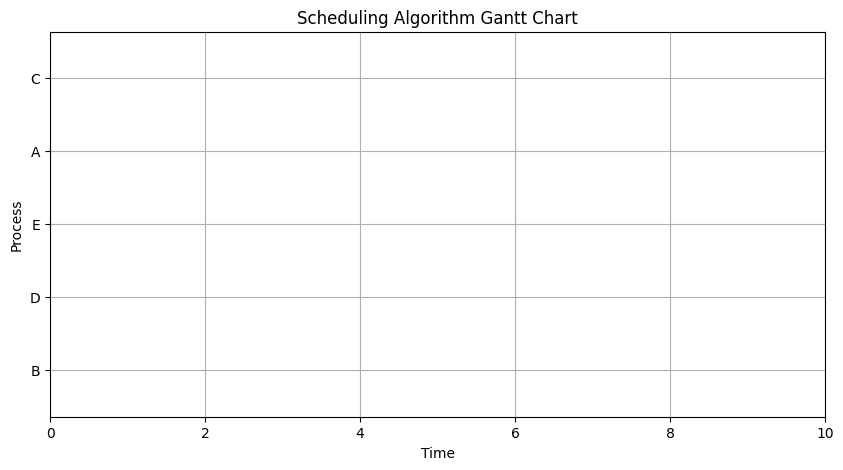

In [91]:
display_gantt_chart(scheduled_processes)